<a href="https://colab.research.google.com/github/PuspitoMA/PCVK_Genap_2021/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [109]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

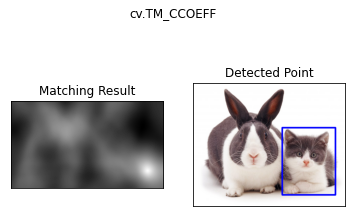

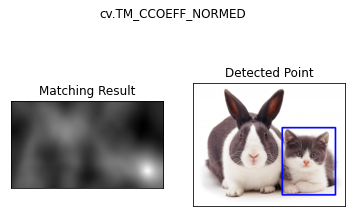

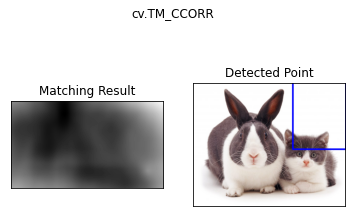

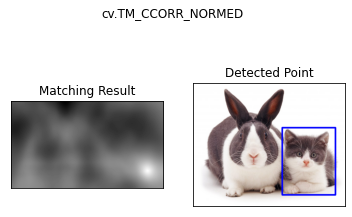

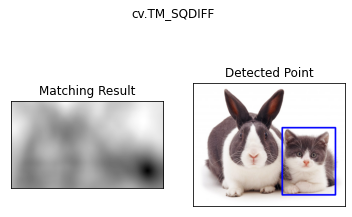

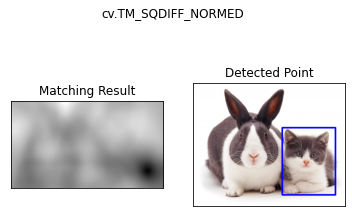

In [4]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
 
for meth in methods:
    img = img2.copy()
    method = eval(meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 10)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

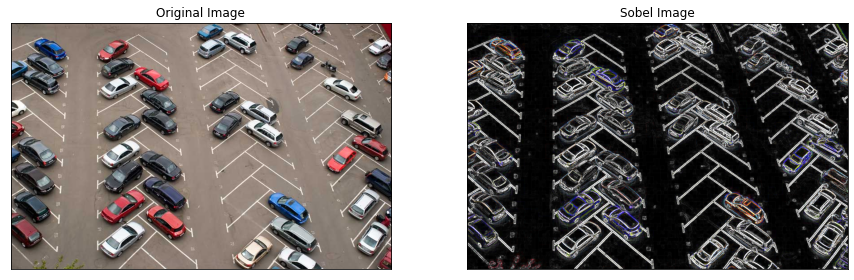

In [50]:
sobel = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/parking-lot-cars.jpg')
img_sobelx = cv.Sobel(sobel, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(sobel, cv.CV_64F, 0, 1, ksize=3)

sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(sobel, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

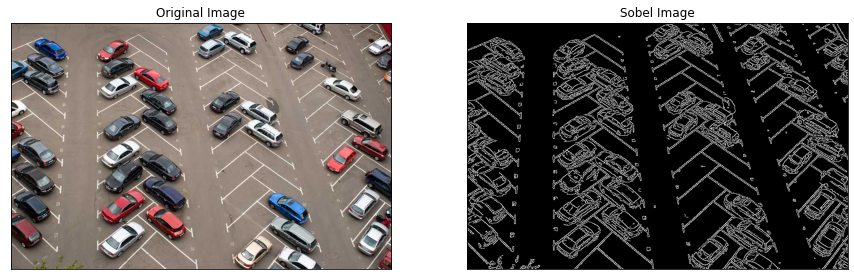

In [44]:
canny = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/parking-lot-cars.jpg')
edges = cv.Canny(canny,100,200)

plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(canny, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

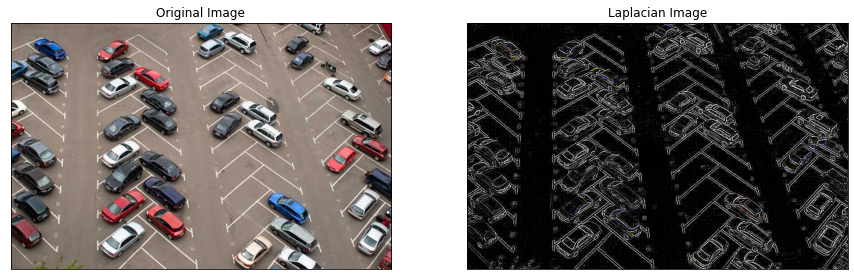

In [45]:
lap = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/parking-lot-cars.jpg')
laplacian = cv.Laplacian(lap, cv.CV_8U, ksize=3)

plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(lap, cv.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

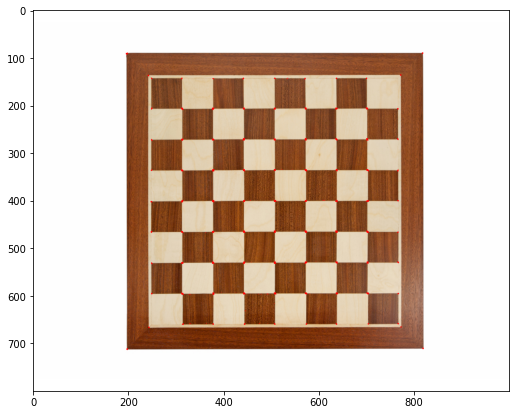

In [115]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/chess-board.jpg') 
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
harris = cv.cornerHarris(gray_img,3,1,0.04)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
img[harris>0.01*harris.max()]=[0,0,255]

plt.figure(figsize=(15,7)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

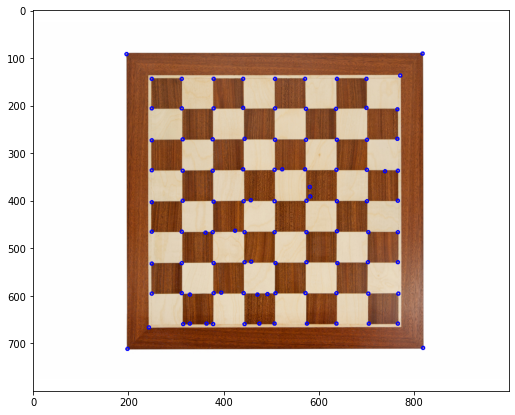

In [114]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/chess-board.jpg') 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,2)

plt.figure(figsize = (15,7))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

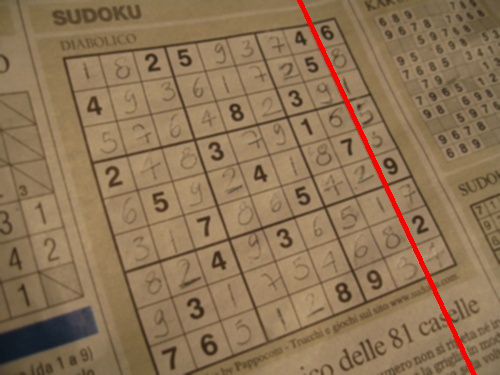

In [112]:
img = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/sudoku.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv_imshow(img)

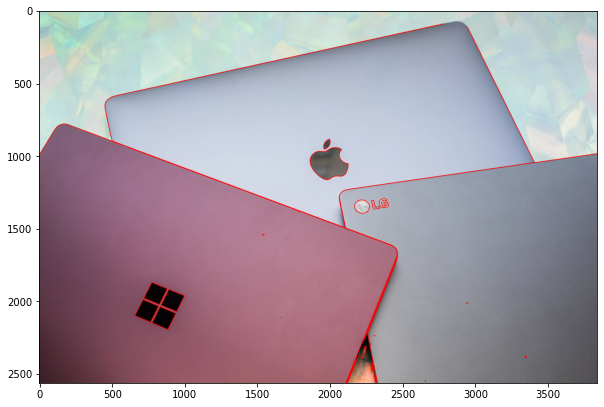

In [110]:
contour = cv.imread('/content/drive/MyDrive/Semester 6/PCVK_MM/Images/laptop.jpg')
img_gray = cv.cvtColor(contour, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(contour, contours, -1, (0,0,255), 3)

plt.figure(figsize=(10,10)) 
plt.imshow(cv.cvtColor(contour, cv.COLOR_BGR2RGB))